<a href="https://colab.research.google.com/github/lavanyamudaliyar/The-Sparks-Foundation-Tasks/blob/main/TSF(Unsupervised%20ML_Task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **THE SPARKS FOUNDATION INTERNSHIP**

**Data Science and Business Analytics - Task 2**

**Prediction using Unsupervised ML**


*   Predict the optimum number of clusters and visualize it.
*   Data can be found at the given link - https://bit.ly/3kXTdox

**Name - Lavanya Jaykumar Mudaliyar**

**Importing required Libaries**

In [2]:
import numpy as np                                   #for mathematical operations 
import pandas as pd                                  #for manipulation and storage
import matplotlib.pyplot as plt                      #for plotting
import seaborn as sns                                #for plotting with better visualization
from sklearn.cluster import KMeans                   #for creating ML models
from sklearn.preprocessing import StandardScaler     #for scaling the data


In [3]:
df= pd.read_csv('iris.csv') #Loading data from the iris.csv file and printing it 
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.head() #shows the top most of datas from the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Checking Null/Missing Values**

In [5]:
df.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Here we could see no null values in our dataset

**Outliers Detection**

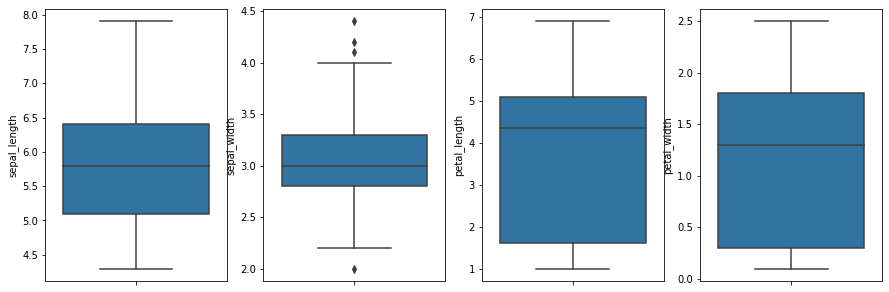

In [6]:
plt.rcParams["figure.figsize"] = (15,5)
f, axes = plt.subplots(1,4)
sns.boxplot(y= 'sepal_length', data = df, ax= axes[0])
sns.boxplot(y= 'sepal_width', data = df, ax= axes[1])
sns.boxplot(y= 'petal_length', data = df, ax= axes[2])
sns.boxplot(y= 'petal_width', data = df, ax= axes[3])

As we could see there are only 4 outliers hence, we will ignore it.

**Finding the optimun number of clusters for K means and to determine the value of K**

In [15]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values


wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


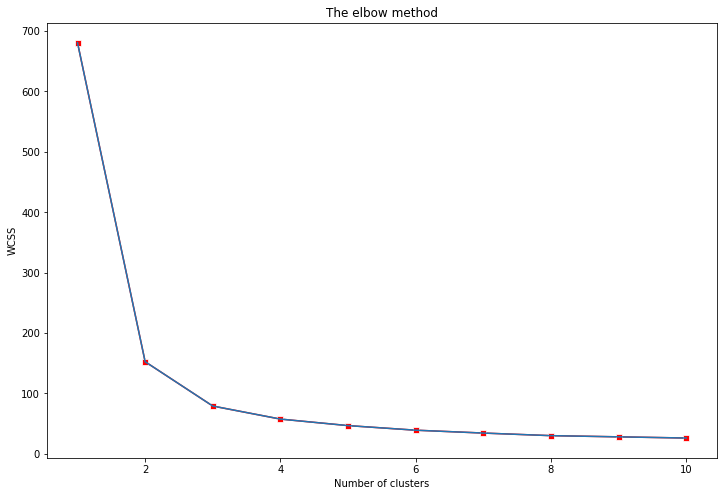

In [27]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.figure(figsize=(12,8))
sns.lineplot(range(1,11), wcss, marker='s', color='r')
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


We can clearly see why the graph is named as **'The Elbow Method'**, the optimum clusters is where the elbow occurs.This is when the clusters sum of squares doesnt decrease significantly with every iteration. **From this we choose the number of clusters as 3**

**Visualization of the clusters**

In [32]:
# Applying Kmeans to the dataset/Creating Kmeans Classifier
kmeans= KMeans(n_clusters=3, init= 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans= kmeans.fit_predict(x)

In [33]:
#checking y_kmeans
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

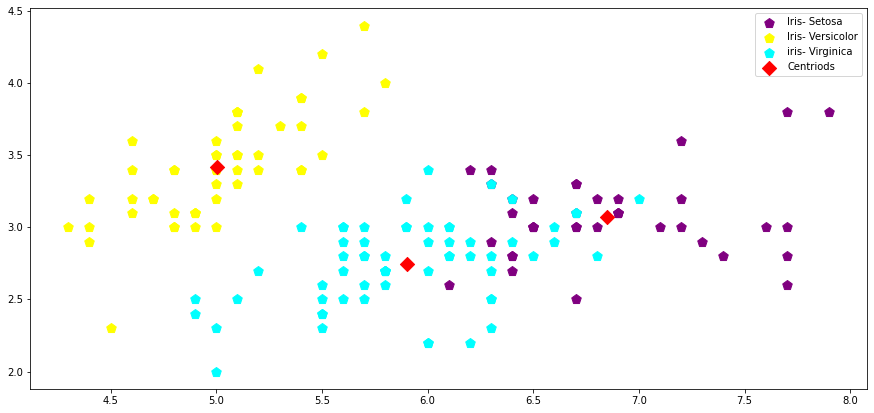

In [42]:
#Visualizing the clusters
plt.figure(figsize=(15,7))
plt.scatter(x[y_kmeans== 0,0], x[y_kmeans== 0,1], s= 100, c='purple', marker='p' ,label= 'Iris- Setosa')
plt.scatter(x[y_kmeans== 1,0], x[y_kmeans== 1,1], s= 100, c='yellow',marker='p', label= 'Iris- Versicolor')
plt.scatter(x[y_kmeans== 2,0], x[y_kmeans== 2,1], s= 100, c='cyan',marker='p',  label= 'iris- Virginica')

#plotting the centriods of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c='red', label='Centriods', marker='D')
plt.legend()

**CONCLUSION**


The number of optimum clusters in the given Iris dataset is **3**.